# Portfolio Update #2: Data Cleaning and Visualization

In this "tidy data" project, I will be loading in a messy dataset on the 2008 Olympic medalists and doing some cleaning and basic exploratory data analysis (EDA) on it. To run all of the code for yourself, make sure to download the "TidyData-Project" folder from my data science portfolio on GitHub (https://github.com/t-clark04/Clark-Data-Science-Portfolio/tree/main). The Olympic medalist data will be contained within the "data" folder, and all other packages and dependencies will be explained and loaded in along the way. Thank you for checking out my project!

## Data Cleaning

First things first, we need to load in the .csv file as a pandas DataFrame and take a look at the first few rows of data to get of sense of what we're dealing with.

In [122]:
# Importing pandas so that we can create a pandas DataFrame from our .csv file
import pandas as pd

import warnings

# Reading in the data using the read_csv() function in pandas and assigning
# the resulting dataframe to the variable df_messy
df_messy = pd.read_csv("data/olympics_08_medalists.csv")

# Using the .head() method to dispaly the first 10 rows of the DataFrame
df_messy.head(10)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acer Nethercott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam Korol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Kreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bronze


It looks like the first column of our dataset contains the name of each Olympic medalist (which will eventually need to be our identifier variable). The rest of the column names are Olympic sports, with each cell containing whether or not the given athlete earned an Olympic medal in that sport (specifying gold, silver, or bronze if true).

So, the first thing we should do here is use the .melt() method to pivot the DataFrame to long format. We'll set medalist_name as our identifier variable, convert the rest of the column names to their own variable called "Sport", and assign the re-formatted values to a variable called "Medal". Then, we'll take a look to see what we have after that.

In [123]:
# Using the .melt() method to convert our Olympic medal data from wide to long format
df_tidy = pd.melt(df_messy,
                  id_vars = "medalist_name",
                  value_vars = df_messy.columns[1:],
                  var_name = "Sport",
                  value_name = "Medal")

df_tidy

,medalist_name,Sport,Medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN
...,...,...,...
131245,Éver Banega,male_greco-roman wrestling,NaN
131246,Ólafur Stefánsson,male_greco-roman wrestling,NaN
131247,Óscar Brayson,male_greco-roman wrestling,NaN
131248,Łukasz Pawłowski,male_greco-roman wrestling,NaN


We're still stuck with a bunch of NaN values in the medal column, since we now have every possible combination of athlete_name and sport in this dataset, even though each athlete only earned a medal in one sport.

So next, we'll drop all of the rows showing NaN in the medal column, since they don't really tell us anything.

In [124]:
# Using the .dropna() method to drop every row with missing data.
df_tidy = df_tidy.dropna()

df_tidy

,medalist_name,Sport,Medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold
...,...,...,...
130932,Steeve Guénot,male_greco-roman wrestling,gold
131159,Yannick Szczepaniak,male_greco-roman wrestling,bronze
131162,Yavor Yanakiev,male_greco-roman wrestling,bronze
131200,Yury Patrikeyev,male_greco-roman wrestling,bronze


That's more like it! But we can actually clean up this dataset even more by separating out the sport gender from the sport name, since they are currently both contained within the "Sport" column. We'll use  ``str.split()``to do this, separating this column into a "Gender" column and a "Sport" column.

In [125]:
# Creating two new columns from the "Sport" column, splitting on an underscore
# as our delimiter and expanding these values into two separate columns
df_tidy[["Gender", "Sport"]] = df_tidy["Sport"].str.split(pat = "_", expand = True)

df_tidy

C:\Users\t_cla\AppData\Local\Temp\ipykernel_18764\2767810518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tidy[["Gender", "Sport"]] = df_tidy["Sport"].str.split(pat = "_", expand = True)


,medalist_name,Sport,Medal,Gender
177,Bair Badënov,archery,bronze,male
676,Ilario Di Buò,archery,silver,male
682,Im Dong-hyun,archery,gold,male
760,Jiang Lin,archery,bronze,male
920,Lee Chang-hwan,archery,gold,male
...,...,...,...,...
130932,Steeve Guénot,greco-roman wrestling,gold,male
131159,Yannick Szczepaniak,greco-roman wrestling,bronze,male
131162,Yavor Yanakiev,greco-roman wrestling,bronze,male
131200,Yury Patrikeyev,greco-roman wrestling,bronze,male


Finally, I notice that the index numbers are all messed up from when we originally melted the dataframe. Let's re-sort the values in our dataframe by athlete name and then reset our indices. Let's also rename the "medalist_name" column to "Athlete" while we're at it to maintain a similar naming convention across columns.

We'll do all of this with method chaining.

In [126]:
# Sorting the dataframe by athlete name, resetting the index, and renaming 
# the medalist_name column to "Athlete"
df_tidy = (df_tidy.sort_values(by = "medalist_name")
           .reset_index(drop = True)
           .rename(columns = 
                   {"medalist_name": "Athlete"})
)

df_tidy

,Athlete,Sport,Medal,Gender
0,Aaron Armstrong,athletics,gold,male
1,Aaron Peirsol,swimming,gold,male
2,Abdullo Tangriev,judo,silver,male
3,Abeer Abdelrahman,weightlifting,bronze,female
4,Abhinav,shooting sport,gold,male
...,...,...,...,...
1870,Éver Banega,association football,gold,male
1871,Ólafur Stefánsson,handball,silver,male
1872,Óscar Brayson,judo,bronze,male
1873,Łukasz Pawłowski,rowing,silver,male


Look at that! Beautiful! We now have a tidy dataframe, where each row represents one Olympic medalist and each column gives different attributes of that athlete, namely the sport they played, the medal they earned in the 2008 Olympics, and their gender.

But before we continue with our exploratory data analysis, we should do a little bit more data validation to avoid any potential issues that could arise in the future. We know that the dataset now contains no missing values, since we dropped those after melting the DataFrame. We also don't have to worry about outliers here, since all of our variables are in this dataset are categorical. We can, however, check for duplicates to make sure all of our data entries are unique. We'll use the ``.duplicated()`` method for this.

In [127]:
# Adding up the number of duplicated rows in the dataset
df_tidy.duplicated().sum()

0

Since this code returns ``0``, we know that all of the observations in our tidy dataset are unique. We don't have to worry about any dates in our dataset, which are usually the biggest culprit in terms of incorrect data types. However, we should still check to make sure that all of the values for a given variable make sense. We'll use ``.unique()`` to see all of the unique values for each of our variables to make sure that values are consistent and logical.

In [128]:
# Printing the unique values of the "Gender" variable
print(df_tidy["Gender"].unique())

# Printing the unique values of the "Medal" variable
print(df_tidy["Medal"].unique())

# Printing the unique values of the "Sport" variable
print(df_tidy["Sport"].unique())

# Printing the number of sports in the dataset
print(df_tidy["Sport"].unique().__len__())

['male' 'female']
['gold' 'silver' 'bronze']
['athletics' 'swimming' 'judo' 'weightlifting' 'shooting sport' 'rowing'
 'greco-roman wrestling' 'fencing' 'water polo' 'canoeing and kayaking'
 'baseball' 'freestyle wrestling' 'synchronized swimming' 'handball'
 'field hockey' 'volleyball' 'boxing' 'sailing' 'track cycling'
 'association football' 'artistic gymnastics' 'road bicycle racing'
 'diving' 'taekwondo' 'rhythmic gymnastics' 'tennis' 'softball'
 'equestrian sport' 'modern pentathlon' 'basketball' 'bmx' 'archery'
 'triathlon' 'badminton' 'table tennis' 'trampoline gymnastics'
 'beach volleyball' 'mountain biking']
38


As we can see, the gender column contains only two values -- "male" or "female". The medal column contains three values -- "gold", "silver", and "bronze". And the sport column contains 38 unique and valid sports. We're good to go!

## Visualization

Let's start off by at the breakdown of Olympic medals by gender. We want to see how many gold, silver, and bronze medals were won by males vs. females in the 2008 Olympics. We'll use a pivot table for this!

In [129]:
# Using the pivot_table function within the pandas library
pd.pivot_table(df_tidy,
               index = "Medal", # Use the values of "Medal" as our row labels
               columns = "Gender", # Use the values of "Gender" as our column labels
               values = "Sport", 
               aggfunc = "count") # And count the values across sports to give us the total we want

Gender,female,male
Medal,,
bronze,294,374
gold,271,315
silver,278,343


Wow! Look at that! We notice that in every medal category, the male athletes earned a greater number than the female athletes. This is likely due to a larger number of male sports in the Olympics, rather than a difference in athletic ability. After all, there are not very many mixed-gender sports in the Olympics. Still, let's visualize this insight, using the ``countplot`` function in the ``seaborn`` library!

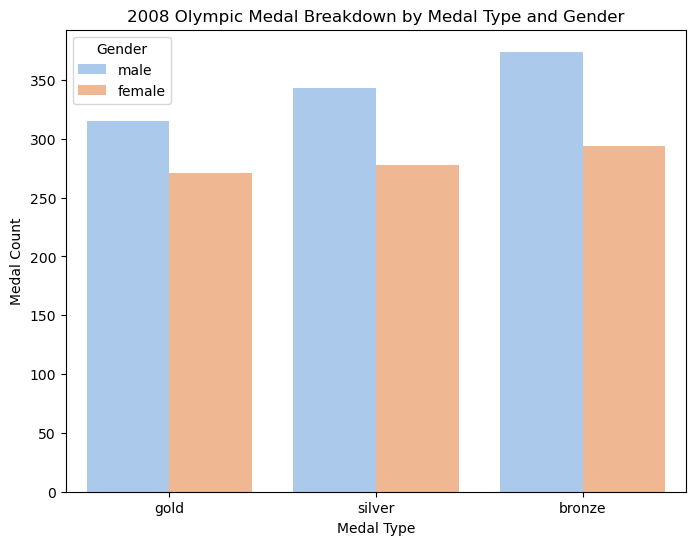

In [130]:
# Importing the seaborn library for making the bar chart
import seaborn as sns
# Importing matplotlib.pyplot to create our graphing "canvas"
import matplotlib.pyplot as plt

# Creating an 8 x 6 Canvas for our plot
plt.figure(figsize = (8,6))
# Generating our side-by-side bar chart, with "Medal" on the x-axis, "count" on the
# y-axis, "Gender" assigned to bar color, and color palette set to a nice pastel
sns.countplot(data = df_tidy, x = "Medal", hue = "Gender", palette = "pastel")

# Graph labels
plt.xlabel("Medal Type")
plt.ylabel("Medal Count")
plt.title("2008 Olympic Medal Breakdown by Medal Type and Gender")

# Displaying the resulting plot
plt.show()

Now, we may want to look at the breakdown of medals by sport instead, to see which Olympic sports award medals to the most athletes. Time to make another pivot table, although this one will be considerably longer, given that there are 38 unique sports in the dataset.

In [131]:
# Using the pivot_table function once again
pd.pivot_table(df_tidy,
               index = "Sport", # Use the values of "Sport" as our row labels
               columns = "Medal", # Use the values of "Medal" as our column labels
               values = "Gender", 
               aggfunc = "count") # And count the values across gender to give us the total we want

Medal,bronze,gold,silver
Sport,,,
archery,8,5,7
artistic gymnastics,19,14,16
association football,36,37,36
athletics,55,52,59
badminton,7,7,8
baseball,24,24,24
basketball,24,23,24
beach volleyball,4,4,4
bmx,2,2,2


Here, we can see that athetics appears to award the most medals, but this table is just too large for us to comprehend. Let's use some pie charts instead, to visualize this data and wrap our heads around it a bit better. We'll group all sports with less than 20 medals of a particular kind within the "Other" category.

In [134]:
warnings.filterwarnings('ignore')

df_gold = df_tidy.query('Medal == "gold"')
df_silver = df_tidy.query('Medal == "silver"')
df_bronze = df_tidy.query('Medal == "bronze"')

gold_counts = df_gold["Sport"].value_counts()
df_gold["Sport_Grouped"] = df_gold['Sport'].apply(lambda x: x if gold_counts[x] >= 25 else "Other")
gold_counts = df_gold['Sport_Grouped'].value_counts()

silver_counts = df_silver["Sport"].value_counts()
df_silver["Sport_Grouped"] = df_silver['Sport'].apply(lambda x: x if silver_counts[x] >= 25 else "Other")
silver_counts = df_silver['Sport_Grouped'].value_counts()

bronze_counts = df_bronze["Sport"].value_counts()
df_bronze["Sport_Grouped"] = df_bronze['Sport'].apply(lambda x: x if bronze_counts[x] >= 25 else "Other")
bronze_counts = df_bronze['Sport_Grouped'].value_counts()


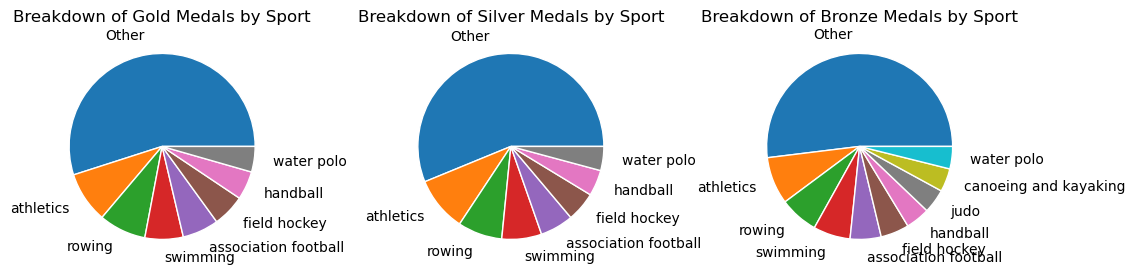

In [147]:
plt.figure(figsize = (12,8))

plt.subplot(1,3,1)
plt.pie(gold_counts, labels = gold_counts.index, labeldistance = 1.2, wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})
plt.title("Breakdown of Gold Medals by Sport")

plt.subplot(1,3,2)
plt.pie(silver_counts, labels = silver_counts.index, labeldistance = 1.2, wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})
plt.title("Breakdown of Silver Medals by Sport")

plt.subplot(1,3,3)
plt.pie(bronze_counts, labels = bronze_counts.index, labeldistance = 1.2, wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})
plt.title("Breakdown of Bronze Medals by Sport")

plt.subplots_adjust(wspace=0.5)

plt.show()